<a href="https://colab.research.google.com/github/DATA3750/WeeklyDemo/blob/main/Wk4_working_with_API_line_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with API

Using APIs to access web data is a common skill in the data science and analysis world. Working in this increasingly popular and high-earning field requires querying and retrieving data — and often integrating it into your own apps.

An API (application programming interface) is a collection of tools that allows different applications to interact. Some of the biggest names on the web (like Reddit, Spotify, Twitter, and Facebook) offer free APIs to make the valuable data on their servers available. 

Other companies and services charge for these APIs. Learning to work with APIs will prepare you to work in data retrieval and analysis to generate insights and help make valuable predictions.


## API Requests

Organizations host their APIs on web servers. When you type www.google.com in your browser's address bar, your computer is actually asking the www.google.com server for a web page; the server returns the page to your browser.

APIs work much the same way, except instead of your web browser asking for a web page, your program asks for data. The API usually returns this data in JavaScript Object Notation (JSON) format. We'll discuss JSON more later on in this lesson.

We make an API request to the web server with the data we want. The server then replies and sends it to us. In Python, we do this using the [requests library](https://requests.readthedocs.io/en/latest/).

## Types of Requests

There are many different types of requests. The most common is a GET request, which we use to retrieve data.

We can use a simple *GET* request to retrieve information from the [OpenNotify](http://open-notify.org/) API.

OpenNotify has several API **endpoints**. An endpoint is a server route for retrieving specific data from an API. For example, the /comments endpoint on the reddit API might retrieve information about comments, while the /users endpoint might retrieve data about users.

The first endpoint we'll look at on OpenNotify is the iss-now.json endpoint. This endpoint gets the current latitude and longitude position of the ISS (International Space Station). A dataset wouldn't be a good tool for this task because the information changes often, and it involves some calculation on the server.

Check out the [complete list of OpenNotify](http://open-notify.org/Open-Notify-API/) endpoints.

In [ ]:
import requests
# Make a get request to get the latest position of the ISS from the OpenNotify API.
response = requests.get("http://api.open-notify.org/iss-now.json")

The server will send a status code indicating the success or failure of your request. You can get the status code of the response from response.status_code.

In [ ]:
status_code = response.status_code
status_code

200

The request we just made returned a status code of 200. Web servers return status codes every time they receive an API request. A status code reports what happened with a request. Here are some codes that are relevant to GET requests:

    200 — Everything went okay, and the server returned a result (if any).

    301 — The server is redirecting you to a different endpoint. This can happen when a company switches domain names, or when an endpoint's name has changed.

    401 — The server thinks you're not authenticated. This happens when you don't send the right credentials to access an API.

    400 — The server thinks you made a bad request. This can happen when you don't send the information that the API requires to process your request (among other things).

    403 — The resource you're trying to access is forbidden, and you don't have the right permissions to see it.

    404 — The server didn't find the resource you tried to access.

In [ ]:
# Make a GET request to http://api.open-notify.org/iss-pass.jason
response = requests.get("http://api.open-notify.org/iss-pass.json")

# Assign the status code of the response to status_code.
status_code = response.status_code
status_code

404

iss-pass wasn't a valid endpoint, so the API's server sent us a 404 status code in response. 

In [ ]:
response = requests.get("http://api.open-notify.org/astros.json")
status_code = response.status_code
status_code

200

Another Example

In [ ]:
import requests
import pandas as pd

# Make a GET request to the URL
response = requests.get("https://opensky-network.org/api/states/all")

# Check the status code to see if the request was successful
if response.status_code == 200:
    # Get the JSON data from the response
    data = response.json()
    # Extract the states from the data
    states = data['states']
    # Check if the 'columns' key exists
    if 'columns' in data:
        # Extract the columns from the data
        columns = data['columns']
    else:
        # If the 'columns' key doesn't exist, create a default list of column names
        columns = ['column{}'.format(i) for i in range(len(states[0]))]
    # Create a DataFrame from the states
    df = pd.DataFrame(states, columns=columns)
 


In [ ]:
df.head()

,column0,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10,column11,column12,column13,column14,column15,column16
0,a40bd8,N36VK,United States,1.675466e+09,1675465992,-95.0113,38.4562,2301.24,False,75.36,212.17,-0.33,None,2362.20,None,False,0
1,ab1644,UAL2467,United States,1.675466e+09,1675466151,-81.1178,39.0509,8519.16,False,181.50,302.97,0.00,None,8321.04,None,False,0
2,a4be54,N4043X,United States,1.675466e+09,1675466136,-111.7286,33.9854,1310.64,False,62.97,4.69,-0.65,None,1386.84,None,False,0
3,a7b08d,LXJ595,United States,1.675466e+09,1675466151,-88.4250,29.5016,13106.40,False,180.16,297.37,-0.33,None,13510.26,None,False,0
4,aa56da,UAL2072,United States,1.675466e+09,1675466151,-118.3426,47.4782,10668.00,False,258.77,89.54,0.00,None,10485.12,3770,False,0


## JSON Format

Strings are how we pass information back and forth through APIs, but it's not easy to get the information we want out of them. How do we know how to decode the string we receive and work with it in Python?

Luckily, there's a format called JSON. This format encodes data structures like lists and dictionaries as strings to ensure that machines can read them easily. JSON is the main format for sending and receiving data through APIs.

Python offers great support for JSON through its json library. We can convert lists and dictionaries to JSON, and vice versa. 

The JSON library has two main methods:

    dumps — takes in a Python object and converts it to a string
    
    loads — takes in a JSON string and converts it to a Python object

In [ ]:
# Make a list of fast food chains.
best_food_chains = ["Taco Bell", "Shake Shack", "Chipotle"]
print(type(best_food_chains))

# Import the JSON library.
import json

# Use json.dumps to convert best_food_chains to a string.
best_food_chains_string = json.dumps(best_food_chains)
print(type(best_food_chains_string))

# Convert best_food_chains_string back to a list.
print(type(json.loads(best_food_chains_string)))

# Make a dictionary
fast_food_franchise = {
    "Subway": 24722,
    "McDonalds": 14098,
    "Starbucks": 10821,
    "Pizza Hut": 7600
}

# We can also dump a dictionary to a string and load it.
fast_food_franchise_string = json.dumps(fast_food_franchise)
print(type(fast_food_franchise_string))
fast_food_franchise_2 = json.loads(fast_food_franchise_string)

<class 'list'>
<class 'str'>
<class 'list'>
<class 'str'>


##  Content Type

The server sends more than a status code and the data when it generates a response. It also sends metadata with information on how it generated the data and how to decode it. This information appears in the response headers. We can access it using the .headers property.

The headers will appear as a dictionary. For now, the content-type within the headers is the most important key. It tells us the format of the response, and how to decode it. For the OpenNotify API, the format is JSON, so we were able to decode it with JSON earlier.

In [ ]:
# Headers is a dictionary
print(response.headers)
content_type = response.headers["content-type"]

{'Server': 'nginx/1.10.3', 'Date': 'Wed, 01 Feb 2023 16:18:58 GMT', 'Content-Type': 'application/json', 'Content-Length': '492', 'Connection': 'keep-alive', 'access-control-allow-origin': '*'}


OpenNotify has one more API endpoint, astros.json. It tells us how many people are currently in space. 

In [ ]:
# Call the API here.
response = requests.get("http://api.open-notify.org/astros.json")
json_data = response.json()

in_space_count = json_data["number"]
in_space_count

10

In [ ]:
json_data

{'message': 'success',
 'people': [{'name': 'Sergey Prokopyev', 'craft': 'ISS'},
  {'name': 'Dmitry Petelin', 'craft': 'ISS'},
  {'name': 'Frank Rubio', 'craft': 'ISS'},
  {'name': 'Nicole Mann', 'craft': 'ISS'},
  {'name': 'Josh Cassada', 'craft': 'ISS'},
  {'name': 'Koichi Wakata', 'craft': 'ISS'},
  {'name': 'Anna Kikina', 'craft': 'ISS'},
  {'name': 'Fei Junlong', 'craft': 'Shenzhou 15'},
  {'name': 'Deng Qingming', 'craft': 'Shenzhou 15'},
  {'name': 'Zhang Lu', 'craft': 'Shenzhou 15'}],
 'number': 10}

## Yahoo Finance API

Yahoo finance has large datasets of the historical financial dataset. It not only contains stock prices but also other calculated metrics like beta that measure the volatility of a stock compared to the volatility of the entire stock market. That’s why it is a great python module.

In [ ]:
!pip3 install yfinance

In [ ]:
!pip install yahoofinancials

### Import all necessary python libraries.

In [ ]:
import pandas as pd

import yfinance as yf

from yahoofinancials import YahooFinancials

import matplotlib.pyplot as plt


### Download the data from Yahoo Finance API

#### Method 1 How to use yfinance

The module ‘yfinance’ is now a very popular library that is very python friendly and can be used as a patch to pandas_datareader or a standalone library in itself. 

To download the data you have to use download() method. 
Inside the download method, you have to pass the tickers(stock name) and date range. Date range is not necessary but for learning purposes, I am setting a date from the last 5 years.

In [ ]:
df_meta = yf.download('META',
start='2018-01-01',
end='2023-01-31',                  
progress=False)                      


In [ ]:
df_meta.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02 00:00:00-05:00,177.679993,181.580002,177.550003,181.419998,181.419998,18151900
2018-01-03 00:00:00-05:00,181.880005,184.779999,181.330002,184.669998,184.669998,16886600
2018-01-04 00:00:00-05:00,184.899994,186.210007,184.100006,184.330002,184.330002,13880900
2018-01-05 00:00:00-05:00,185.589996,186.899994,184.929993,186.850006,186.850006,13574500
2018-01-08 00:00:00-05:00,187.199997,188.899994,186.330002,188.279999,188.279999,17994700


There are many parameters of the download function which you can find in the documentation and start and end are some of the most common ones to be used. Since the data was small, the progress bar was set to false and showing it makes no sense and should be used for high volume or data.

In [ ]:
# downloading multipl tickers
df_yahoo = yf.download(['META',"AAPL"],
start='2018-01-01',
end='2023-01-31',
progress=True)

[*********************100%***********************]  2 of 2 completed


In [ ]:
df_yahoo.head()

Adj Close                  Close              \
                                AAPL        META       AAPL        META   
Date                                                                      
2018-01-02 00:00:00-05:00  40.950500  181.419998  43.064999  181.419998   
2018-01-03 00:00:00-05:00  40.943352  184.669998  43.057499  184.669998   
2018-01-04 00:00:00-05:00  41.133541  184.330002  43.257500  184.330002   
2018-01-05 00:00:00-05:00  41.601864  186.850006  43.750000  186.850006   
2018-01-08 00:00:00-05:00  41.447346  188.279999  43.587502  188.279999   

                                High                    Low              \
                                AAPL        META       AAPL        META   
Date                                                                      
2018-01-02 00:00:00-05:00  43.075001  181.580002  42.314999  177.550003   
2018-01-03 00:00:00-05:00  43.637501  184.779999  42.990002  181.330002   
2018-01-04 00:00:00-05:00  43.367500  186.210007  43.020000  184.100006   
2018-01-05 00:00:00-05:00  43.842499  186.899994  43.262501  184.929993   
2018-01-08 00:00:00-05:00  43.902500  188.899994  43.482498  186.330002   

                                Open                 Volume            
                                AAPL        META       AAPL      META  
Date                                                                   
2018-01-02 00:00:00-05:00  42.540001  177.679993  102223600  18151900  
2018-01-03 00:00:00-05:00  43.132500  181.880005  118071600  16886600  
2018-01-04 00:00:00-05:00  43.134998  184.899994   89738400  13880900  
2018-01-05 00:00:00-05:00  43.360001  185.589996   94640000  13574500  
2018-01-08 00:00:00-05:00  43.587502  187.199997   82271200  17994700

Removing Adjusted Close Price

In [ ]:
df_yahoo = yf.download(['META',"AAPL"],
start='2018-01-01',
end='2023-01-31',
progress=False,auto_adjust=True,actions="inline" )

In [ ]:
df_yahoo.head()

Close             Dividends            High  \
                                AAPL        META      AAPL META       AAPL   
Date                                                                         
2018-01-02 00:00:00-05:00  40.950500  181.419998       0.0  0.0  40.960012   
2018-01-03 00:00:00-05:00  40.943367  184.669998       0.0  0.0  41.494891   
2018-01-04 00:00:00-05:00  41.133541  184.330002       0.0  0.0  41.238141   
2018-01-05 00:00:00-05:00  41.601860  186.850006       0.0  0.0  41.689817   
2018-01-08 00:00:00-05:00  41.447342  188.279999       0.0  0.0  41.746874   

                                             Low                   Open  \
                                 META       AAPL        META       AAPL   
Date                                                                      
2018-01-02 00:00:00-05:00  181.580002  40.237326  177.550003  40.451280   
2018-01-03 00:00:00-05:00  184.779999  40.879184  181.330002  41.014685   
2018-01-04 00:00:00-05:00  186.210007  40.907703  184.100006  41.017055   
2018-01-05 00:00:00-05:00  186.899994  41.138297  184.929993  41.231010   
2018-01-08 00:00:00-05:00  188.899994  41.347494  186.330002  41.447342   

                                      Stock Splits          Volume            
                                 META         AAPL META       AAPL      META  
Date                                                                          
2018-01-02 00:00:00-05:00  177.679993          0.0  0.0  102223600  18151900  
2018-01-03 00:00:00-05:00  181.880005          0.0  0.0  118071600  16886600  
2018-01-04 00:00:00-05:00  184.899994          0.0  0.0   89738400  13880900  
2018-01-05 00:00:00-05:00  185.589996          0.0  0.0   94640000  13574500  
2018-01-08 00:00:00-05:00  187.199997          0.0  0.0   82271200  17994700

Apart from the yf.download function, we can also use the ticker module.

<AxesSubplot: title={'center': "Meta's stock price"}, xlabel='Date'>

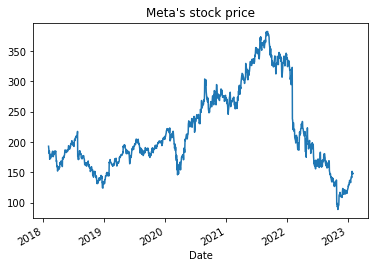

In [ ]:
ticker = yf.Ticker('META')
df_meta = ticker.history(period="5y")
df_meta['Close'].plot(title="Meta's stock price")

Text(0, 0.5, 'Closing Stock Price')

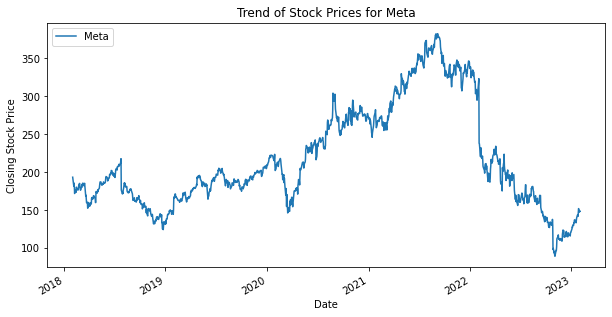

In [ ]:
ticker = yf.Ticker('META')
df_meta = ticker.history(period="5y")


# Create a line chart using Matplotlib
fig, ax = plt.subplots(figsize=(10, 5))
df_meta["Close"].plot(ax=ax, label= "Meta")

# Add a title, legend, and axis labels
ax.set_title("Trend of Stock Prices for Meta")
ax.legend(loc="upper left")
ax.set_xlabel("Date")
ax.set_ylabel("Closing Stock Price")

In [ ]:
ticker.info

{'zip': '94025', 'sector': 'Communication Services', 'fullTimeEmployees': 87314, 'longBusinessSummary': "Meta Platforms, Inc. develops products that enable people to connect and share with friends and family through mobile devices, personal computers, virtual reality headsets, wearables, and in-home devices worldwide. It operates in two segments, Family of Apps and Reality Labs. The Family of Apps segment's products include Facebook, which enables people to share, discover, and connect with interests; Instagram, a community for sharing photos, videos, and private messages, as well as feed, stories, reels, video, live, and shops; Messenger, a messaging application for people to connect with friends, family, groups, and businesses across platforms and devices through chat, audio and video calls, and rooms; and WhatsApp, a messaging application that is used by people and businesses to communicate and transact privately. The Reality Labs segment provides augmented and virtual reality relat

info – This method prints out a JSON formatter output which contains a lot of information about the company starting from their business full name, summary, industry, exchanges listed on with country and time zone, and more. It also comes equipped with the beta coefficient.

In [ ]:
ticker.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2022-01-19 14:03:49,Morgan Stanley,Overweight,,main
2022-01-26 11:51:52,RBC Capital,Outperform,,main
2022-02-03 09:37:12,Keybanc,Overweight,,main
2022-02-03 10:23:02,Raymond James,Outperform,Strong Buy,down
2022-02-03 10:24:52,BMO Capital,Market Perform,Outperform,down
...,...,...,...,...
2023-01-18 14:18:33,Morgan Stanley,Equal-Weight,,main
2023-01-20 14:44:30,MKM Partners,Buy,,main
2023-01-25 12:32:25,Credit Suisse,Outperform,,main


In [ ]:
ticker.actions

,Dividends,Stock Splits
Date,,


actions – This displays the actions like splits and dividends.

In [ ]:
ticker.major_holders 

,0,1
0,0.22%,% of Shares Held by All Insider
1,75.93%,% of Shares Held by Institutions
2,76.10%,% of Float Held by Institutions
3,3797,Number of Institutions Holding Shares


In [ ]:
ticker.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",181346878,2022-09-29,0.0804,26881046951
1,Blackrock Inc.,150686534,2022-09-29,0.0668,22336264291
2,"FMR, LLC",115273519,2022-09-29,0.0511,17086993228
3,State Street Corporation,89417436,2022-09-29,0.0396,13254346156
4,Price (T.Rowe) Associates Inc,46950755,2022-09-29,0.0208,6959510213
5,Capital International Investors,45778906,2022-09-29,0.0203,6785807040
6,"Geode Capital Management, LLC",43672819,2022-09-29,0.0194,6473621773
7,Capital World Investors,32368464,2022-09-29,0.0144,4797977280
8,Morgan Stanley,30548462,2022-09-29,0.0135,4528198391
9,Capital Research Global Investors,30152317,2022-09-29,0.0134,4469477820


In [ ]:
ticker.calendar

,Value
Earnings Date,2023-02-01 21:00:00
Earnings Average,2.22
Earnings Low,1.41
Earnings High,2.68
Revenue Average,31529300000
Revenue Low,30007600000
Revenue High,32651000000


#### Method 2 How to use yahoofinancials

In [ ]:
yahoo_financials = YahooFinancials('AAPL')
data = yahoo_financials.get_historical_price_data(start_date='2022-01-01', 
                                                  end_date='2022-12-31', 
                                                  time_interval='weekly')
aapl_df = pd.DataFrame(data['AAPL']['prices'])
aapl_df = aapl_df.drop('date', axis=1).set_index('formatted_date')
aapl_df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2022-01-01,182.940002,171.029999,177.830002,172.169998,481949000,171.176544
2022-01-08,177.179993,168.169998,169.080002,173.070007,422655700,172.071350
2022-01-15,172.539993,162.300003,171.509995,162.410004,400041100,161.472855
2022-01-22,170.350006,154.699997,160.020004,170.330002,688258600,169.347137
2022-01-29,176.240005,169.509995,170.160004,172.389999,458553300,171.395264


Coming down on a technical level, the process of obtaining a historical stock price is a bit longer than the case of yfinance but that is mostly due to the huge volume of data. Now we move onto some of the important functions of yahoofinancials.

    get_stock_quote_type_data() – This method returns a lot of generic information about a stock which is similar to the yfinance info() function. The output is something like this.

    get_summary_data() – This method returns a summary of the whole company along with useful data like the beta value, price to book value, and more.

    get_stock_earnings_data() – THis method returns the information on the quarterly and yearly earnings of the company along with the next date when the company will report its earnings.

    get_financial_stmts() – This is another useful method to retrieve financial statements of a company which is useful for the analysis of a stock

    get_historical_price_data() – This is a method similar to the download() or Ticker() function to get the prices of stock with start_date, end_date and interval ranges.

In [ ]:
yahoo_financials = YahooFinancials('BTC-USD')
data=yahoo_financials.get_historical_price_data("2019-01-10", "2022-12-31", "monthly")
btc_df = pd.DataFrame(data['BTC-USD']['prices'])
btc_df = btc_df.drop('date', axis=1).set_index('formatted_date')
btc_df

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2019-02-01,4210.641602,3391.023682,3460.547119,3854.785400,199100675597,3854.785400
2019-03-01,4296.806641,3733.749756,3853.757080,4105.404297,297952790260,4105.404297
2019-04-01,5642.044434,4096.901367,4105.362305,5350.726562,445364556718,5350.726562
2019-05-01,9008.314453,5347.645996,5350.914551,8574.501953,724157870864,8574.501953
2019-06-01,13796.489258,7564.488770,8573.839844,10817.155273,675855385074,10817.155273
2019-07-01,13129.529297,9163.134766,10796.930664,10085.627930,676416326705,10085.627930
2019-08-01,12273.821289,9421.629883,10077.442383,9630.664062,533984971734,9630.664062
2019-09-01,10898.761719,7830.758789,9630.592773,8293.868164,480544963230,8293.868164
2019-10-01,10021.744141,7446.988770,8299.720703,9199.584961,595205134748,9199.584961
